Read preprocessed data

In [10]:
import pickle
# to read the pkl file:
with open('data/preprocessing_output.pkl', 'rb') as file:
    loaded_list = pickle.load(file)
    
# Print the dictionary
print(loaded_list)

[['binance', 'towel', 'come', 'everywhere', 'include', 'breakfast', 'cooking'], ['drop', 'sol', 'address', 'make', 'sure', 'follow', 'dont', 'ask', 'backhand', 'index', 'point', 'medium', 'light', 'skin', 'tone'], ['take', 'one', 'good', 'altcoin', 'change', 'world', 'sparkle'], ['disrespectful', 'one', 'top', '3', 'favorite'], ['congressional', 'republican', 'call', 'affordable', 'connectivity', 'program', 'wasteful', 'call', 'necessary', 'time', 'congress', 'extend', '23', 'million', 'household', 'across', 'america', 'rely', 'program', 'stay', 'connect'], ['donald', 'trump', 'wont', 'american', 'president', 'must', 'refuse', 'denounce', 'political', 'violence', 'ill', 'say', 'trump', 'wont', 'political', 'violence', 'never', 'ever', 'acceptable', 'america'], ['massive', 'bitcoin', 'breakout', 'come', 'ready'], ['ok', 'vote', 'ill', '25', 'ticket', 'giveaway', 'station', 'head', '10', 'min', 'feel', 'like', 'ill', 'come', 'space', 'give', 'another', '5', '10', 'generous', 'queen', 'pr

In [11]:
import pandas as pd

labels = pd.read_pickle('data/labels.pkl')
print(labels)

0      1
1      1
2      2
3      2
4      1
      ..
838    2
839    2
840    1
841    2
842    0
Name: label, Length: 843, dtype: int64


TD-IDF

In [12]:
print(len(loaded_list))
documents = [" ".join(doc) for doc in loaded_list]

843


split train and test dataset

In [13]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size = 0.2, random_state = 42)

tf-idf matrix

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

vectorizer = TfidfVectorizer()
tfidf_matrix_train = vectorizer.fit_transform(X_train)
tfidf_matrix_test = vectorizer.transform(X_test)
print(tfidf_matrix_train)

  (0, 469)	0.3075462792789468
  (0, 2760)	0.26693231003470513
  (0, 2258)	0.21427195552499084
  (0, 2395)	0.23370732554090548
  (0, 2707)	0.2120420874082771
  (0, 1241)	0.3075462792789468
  (0, 1811)	0.29375666480106183
  (0, 2163)	0.3269816492948615
  (0, 2652)	0.3269816492948615
  (0, 911)	0.28306060884031076
  (0, 970)	0.3269816492948615
  (0, 2497)	0.3269816492948615
  (1, 1315)	0.24105791493499507
  (1, 1933)	0.1808161683765024
  (1, 2641)	0.24105791493499507
  (1, 2503)	0.16757539226351179
  (1, 805)	0.24105791493499507
  (1, 1373)	0.2267297415279251
  (1, 1624)	0.16543306219181497
  (1, 1491)	0.2267297415279251
  (1, 2124)	0.19206956648733955
  (1, 874)	0.2086783778674513
  (1, 856)	0.24105791493499507
  (1, 334)	0.2267297415279251
  (1, 1874)	0.24105791493499507
  :	:
  (672, 1145)	0.14411954059038332
  (672, 1305)	0.26260672809748986
  (672, 2187)	0.22235906623619198
  (672, 2587)	0.16296729439042562
  (672, 277)	0.19237577930953492
  (673, 1803)	0.23858868120969196
  (673, 17

In [15]:
labels.value_counts()

label
1    440
2    235
0    168
Name: count, dtype: int64

train data

In [16]:
model = SVC(kernel='linear')
model.fit(tfidf_matrix_train, y_train)

SVC(kernel='linear')

predict data

In [17]:
y_pred = model.predict(tfidf_matrix_test)

accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.727810650887574


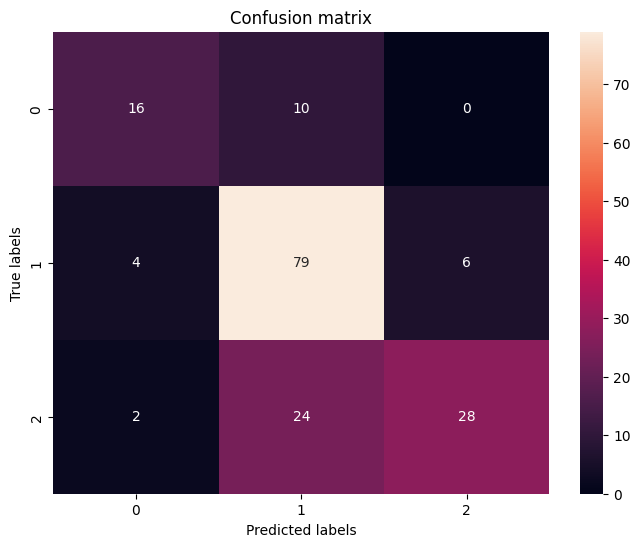

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        26
           1       0.70      0.89      0.78        89
           2       0.82      0.52      0.64        54

    accuracy                           0.73       169
   macro avg       0.75      0.67      0.70       169
weighted avg       0.74      0.73      0.72       169

